In [30]:
import pandas as pd
import numpy as np

In [31]:
#Features Name
features=pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\features.txt",
                     sep=r"\s+",header=None,names=["index","features"])
features.head()

,index,features
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [32]:
#Train Data

In [33]:
X_train=pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\train\X_train.txt"
                    ,sep=r"\s+",header=None)
X_train.columns=features["features"]
X_train.head()

features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [34]:
y_train=pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\train\y_train.txt"
                    ,sep=r"\s+",header=None, names=["activity"])
y_train.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [35]:
print(X_train.shape , y_train.shape)

(7352, 561) (7352, 1)


In [36]:
#Test Data

In [37]:
X_test =pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\test\X_test.txt",
                    sep=r"\s+",header=None)
X_test.columns =features["features"]

In [38]:
y_test=pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\test\y_test.txt",
                   sep=r"\s+",header=None, names=["activity"])

In [39]:
#Activity Labels

In [40]:
activity_labels=pd.read_csv(r"D:\dataset\New folder (2)\Human Activity Recognition\UCI HAR Dataset\activity_labels.txt",
               sep=r"\s+",header=None,names=["id","activity"])
activity_labels

,id,activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC(kernel="linear")
model.fit(X_train, y_train["activity"])

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [45]:
y_pred = model.predict(X_test)
y_pred

array([5, 5, 5, ..., 2, 2, 2], shape=(2947,))

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
print("Accuracy:", accuracy_score(y_test["activity"], y_pred))
print("Classification Report= \n",classification_report(y_test["activity"],y_pred))
cm=confusion_matrix(y_test["activity"],y_pred)
print("Confusion Matrix= \n",cm)

Accuracy: 0.9609772650152698
Classification Report= 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.96      0.96      0.96       471
           3       0.99      0.95      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix= 
 [[495   0   1   0   0   0]
 [ 16 453   2   0   0   0]
 [  6  15 399   0   0   0]
 [  0   2   0 434  55   0]
 [  0   0   0  18 514   0]
 [  0   0   0   0   0 537]]


In [50]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [52]:
labels = activity_labels["activity"].values
labels

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

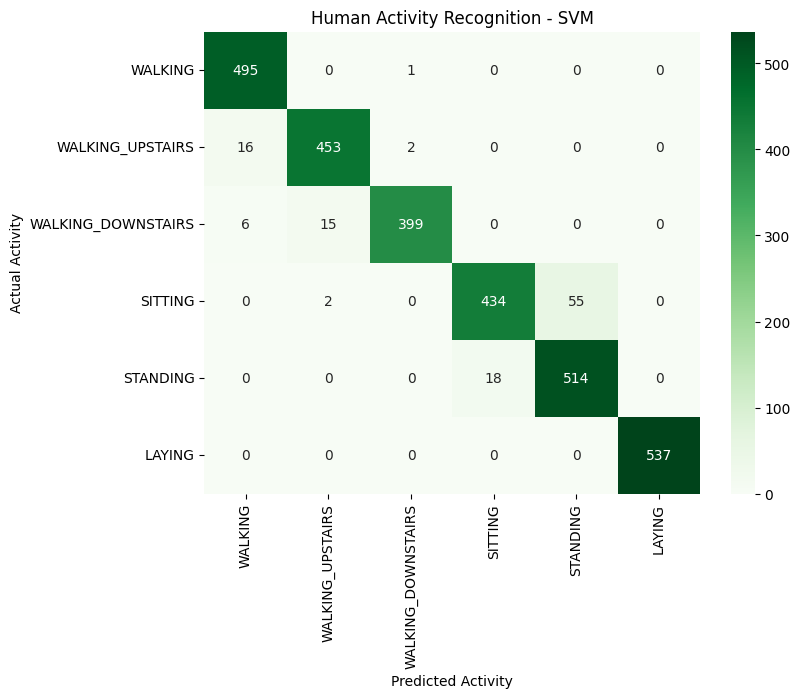

In [63]:
plt.figure(figsize=(8,6))
sbn.heatmap(
    confusion_matrix(y_test["activity"], y_pred),
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Activity")
plt.ylabel("Actual Activity")
plt.title("Human Activity Recognition - SVM")
plt.show()

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

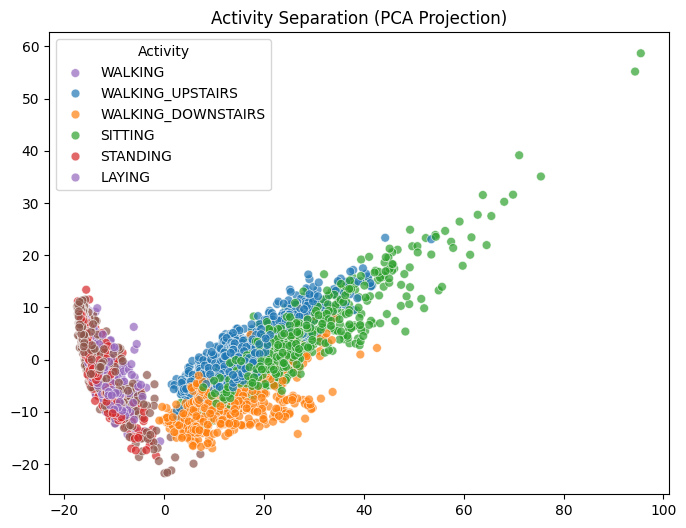

In [73]:
plt.figure(figsize=(8,6))
sbn.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y_train["activity"],
    palette="tab10",
    alpha=0.7, s=40
)
plt.title("Activity Separation (PCA Projection)")
plt.legend(title="Activity",labels=labels)
plt.show()

In [85]:
def predict_activity_simulation():
    idx = int(input(f"Enter a test sample index (0 to {len(X_test)-1}): "))
    
    sample = X_test[idx].reshape(1, -1)
    pred = model.predict(sample)[0]
    
    print("\n🧍 Predicted Human Activity:", labels[pred])


In [95]:
predict_activity_simulation()

Enter a test sample index (0 to 2946):  51



🧍 Predicted Human Activity: STANDING
